<a href="https://colab.research.google.com/github/rashmipathrikar/Book-Recommendation-System/blob/main/Product_analyst_bizup_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required library
import numpy as np
import pandas as pd

In [2]:
# mounting the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading dataset for analysis
path='/content/drive/MyDrive/Bizup/Assignment_ProductAnalyst_Bizup_AM.xlsx'
df1=pd.read_excel(path,sheet_name = "Raw Data 1").iloc[:,:5]
df2 = pd.read_excel(path, sheet_name = "Raw data 2", skiprows = 1).iloc[:,:3]

In [4]:
#Analysing raw dataset 1
df1.head(5)

,event_name,event_date,event_timestamp,user_id,string_value
0,container_clicked,19991221.0,1.674323e+15,63cc2108e1df7aa629dfc681,6305e5f2c997f315e123826b
1,container_clicked,19991221.0,1.674318e+15,63cc115de1df7aa629df6a6a,633e93cc9c20bfc94b28d632
2,container_clicked,19991221.0,1.674345e+15,63cbdde8e1df7aa629ddd82e,63b3f7c4198bc12f50960a2f
3,container_clicked,19991221.0,1.674345e+15,63cbdde8e1df7aa629ddd82e,63b3f7c4198bc12f50960a24
4,container_clicked,19991221.0,1.674345e+15,63cbdde8e1df7aa629ddd82e,6329b0468ab21179907efa38


event_name -> Definition

container_clicked -> Whenever an icon on the homepage is clicked, this event is triggered with a string value which captures the id of the icon
	
user_id -> this is unique identifier of a user

In [5]:
#Analysing raw dataset 2
df2.head(5)

,ContainerID,Container display name,Type
0,63b3f7c4198bc12f50960a15,Delhi,19.0
1,63b3f7c4198bc12f50960a24,Surat,19.0
2,63b3f7c4198bc12f50960a1a,Ludhiana,19.0
3,63b3f7c4198bc12f50960a2f,Bestselling Surat Sarees,4.0
4,6329b0468ab21179907efa47,Jeans,1.0


ContainerId-> Gives the unique container id
container display nume -> THis name for container
Type -> Defines UI of any containers. Containers with same type look the same structure on the home page 

# Exploring dataset 

In [6]:
#Data cleaning
#checking both dataset for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38725 entries, 0 to 38724
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_name       38725 non-null  object 
 1   event_date       38725 non-null  float64
 2   event_timestamp  38725 non-null  float64
 3   user_id          34280 non-null  object 
 4   string_value     38725 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.5+ MB


In [7]:
# Total user_id with user_id is null
print(len(df1[df1.user_id.isnull()]))

4445


In [8]:
#checking both dataset for null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ContainerID             81 non-null     object 
 1   Container display name  80 non-null     object 
 2   Type                    79 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.0+ KB


In [9]:
# Total Type name  is null
print(len(df2[df2.Type.isnull()]))


2


 **Observations:**

1.In first dataset we have null values in user_id column

2.In second dataset we have null values in container display name and type column

Understanding unique elements in dataset columns

This will help in understanding unique elements in each category

In [10]:
for col in df1.columns.tolist():
    print(f"Column name is {col}")
    unique_values = df1[col].unique()
    print(f"Unique values of this column {unique_values}")
    print("-----------------------------------------------------------------------------------------------------")
    print("\n")

Column name is event_name
Unique values of this column ['container_clicked']
-----------------------------------------------------------------------------------------------------


Column name is event_date
Unique values of this column [19991221. 19991203. 19991220. 19991208. 19991223. 19991215. 19991201.
 19991202. 19991206. 19991209. 19991216. 19991205. 19991222. 19991212.
 19991218. 19991217. 19991219. 19991204. 19991213. 19991214. 19991207.
 19991211. 19991210.]
-----------------------------------------------------------------------------------------------------


Column name is event_timestamp
Unique values of this column [1.67432253e+15 1.67431844e+15 1.67434506e+15 ... 1.67446563e+15
 1.67445002e+15 1.67448296e+15]
-----------------------------------------------------------------------------------------------------


Column name is user_id
Unique values of this column ['63cc2108e1df7aa629dfc681' '63cc115de1df7aa629df6a6a'
 '63cbdde8e1df7aa629ddd82e' ... '63cf1a51e1df7aa629ecac22

In [11]:
for col in df2.columns.tolist():
    print(f"Column name is {col}")
    unique_values = df2[col].unique()
    print(f"Unique values of this column {unique_values}")
    print("-----------------------------------------------------------------------------------------------------")
    print("\n")

Column name is ContainerID
Unique values of this column ['63b3f7c4198bc12f50960a15' '63b3f7c4198bc12f50960a24'
 '63b3f7c4198bc12f50960a1a' '63b3f7c4198bc12f50960a2f'
 '6329b0468ab21179907efa47' '63a06b1dc2fbd8a58caa1056'
 '63b3f7c4198bc12f50960a43' '6305e5f2c997f315e123826b'
 '6329b0468ab21179907efa30' '63b3f7c4198bc12f50960a39'
 '633e93cc9c20bfc94b28d646' '633e93cc9c20bfc94b28d632'
 '6329b0478ab21179907efa4c' '63b3f7c4198bc12f50960a7a'
 '633e93cc9c20bfc94b28d637' '6329b0468ab21179907efa05'
 '6329b0478ab21179907efa60' '6329b0468ab21179907efa42'
 '62d13af71b8085bef487e4fb' '62d13af71b8085bef487e50a'
 '627a66787327a813eb09972d' '6329b0468ab21179907efa12'
 '633e93cc9c20bfc94b28d64b' '6329b0468ab21179907efa38'
 '63b3f7c4198bc12f50960a75' '633e93cc9c20bfc94b28d641'
 '62d13af71b8085bef487e519' '63b3f7c4198bc12f50960a4d'
 '6329b0478ab21179907efa74' '63b3f7c4198bc12f50960aac'
 '63031d38c997f315e123825b' '63b3f7c4198bc12f50960a34'
 '63b3f7c4198bc12f50960abb' '6329b0468ab21179907efa2b'
 '63b3f7c

Handling the null values in dataset

In [12]:
# replacing the null value with an others in the dataset 1
df1['user_id'].fillna("others")

0        63cc2108e1df7aa629dfc681
1        63cc115de1df7aa629df6a6a
2        63cbdde8e1df7aa629ddd82e
3        63cbdde8e1df7aa629ddd82e
4        63cbdde8e1df7aa629ddd82e
                   ...           
38720    63cd5e3ee1df7aa629e51fa3
38721    63cd5e3ee1df7aa629e51fa3
38722    63cd5e3ee1df7aa629e51fa3
38723                      others
38724    63ce140ce1df7aa629e75194
Name: user_id, Length: 38725, dtype: object

In [13]:
# replacing the null value with an assumed value in the dataset 2
df2.loc[79,'Container display name'] = 'Display -100'
df2.loc[79,'Type'] =  -100
df2.loc[80,'Type'] =  -101

Understanding comman element in both dataset in order to join two dataset in one frame

In [14]:
df1.head()

,event_name,event_date,event_timestamp,user_id,string_value
0,container_clicked,19991221.0,1.674323e+15,63cc2108e1df7aa629dfc681,6305e5f2c997f315e123826b
1,container_clicked,19991221.0,1.674318e+15,63cc115de1df7aa629df6a6a,633e93cc9c20bfc94b28d632
2,container_clicked,19991221.0,1.674345e+15,63cbdde8e1df7aa629ddd82e,63b3f7c4198bc12f50960a2f
3,container_clicked,19991221.0,1.674345e+15,63cbdde8e1df7aa629ddd82e,63b3f7c4198bc12f50960a24
4,container_clicked,19991221.0,1.674345e+15,63cbdde8e1df7aa629ddd82e,6329b0468ab21179907efa38


In [15]:
#checking unique count in dataset comman column
print(len(df1['string_value'].unique()))


95


In [16]:
print(len(df2['ContainerID'].unique()))

81


In [17]:
set_1 = set(df1['string_value'].values) 
set_2 = set(df2['ContainerID'].values)

In [18]:
print(len(set_1.intersection(set_2)))
print(len(set_1.intersection(set_2)))

81
81


From this we can conclude that both string value in dataset 1 and containerId hava total comman values present in it so we can consider this column as comman for data frame merging

# Adding the containerID present in dataset 1 into dataset 2 with dummy container display and type values

In [19]:
unlisted_containerID_list = list(set_1 - set_2)
unlisted_containerID_list

['627a66787327a813eb099741',
 '62d13af71b8085bef487e500',
 '62fb6bf0c997f315e1238117',
 '62d13af71b8085bef487e505',
 '62e7771014813b19efd98134',
 '62e1066ba0bcd2bc58731f72',
 '62d13af71b8085bef487e50f',
 '62585bb4695a89ca1938eb5e',
 '62fb6bf0c997f315e123810d',
 '63a3fcf88600a12ebf44ea50',
 '62ee942c1a06773e597b66ec',
 '62fb6bf0c997f315e1238112',
 '63678bfae58a6c0b7390ae94',
 '62d1348a1b8085bef487e465']

In [20]:
list_of_type = []
list_of_container_display = []
for index,containerID in enumerate(unlisted_containerID_list):
    type_val = -(index+1)
    list_of_type.append(type_val)
    display_val = 'Display ' + str(type_val)
    list_of_container_display.append(display_val)    
container_dict = {}
container_dict['ContainerID'] = unlisted_containerID_list
container_dict['Container display name'] = list_of_container_display
container_dict['Type'] = list_of_type
container_dict_Df = pd.DataFrame(container_dict)

In [21]:
container_dict_Df.head()

,ContainerID,Container display name,Type
0,627a66787327a813eb099741,Display -1,-1
1,62d13af71b8085bef487e500,Display -2,-2
2,62fb6bf0c997f315e1238117,Display -3,-3
3,62d13af71b8085bef487e505,Display -4,-4
4,62e7771014813b19efd98134,Display -5,-5


In [22]:
df2 = df2.append(container_dict_Df,ignore_index=True)
df2.tail(10)

,ContainerID,Container display name,Type
85,62e7771014813b19efd98134,Display -5,-5.0
86,62e1066ba0bcd2bc58731f72,Display -6,-6.0
87,62d13af71b8085bef487e50f,Display -7,-7.0
88,62585bb4695a89ca1938eb5e,Display -8,-8.0
89,62fb6bf0c997f315e123810d,Display -9,-9.0
90,63a3fcf88600a12ebf44ea50,Display -10,-10.0
91,62ee942c1a06773e597b66ec,Display -11,-11.0
92,62fb6bf0c997f315e1238112,Display -12,-12.0
93,63678bfae58a6c0b7390ae94,Display -13,-13.0
94,62d1348a1b8085bef487e465,Display -14,-14.0


Merging two dataframein one single datafame.

In [23]:
# renameing string value column in dataset 1 to ContainerID column
df1 = df1.rename(columns = {'string_value':'ContainerID'})
df1.head(2)

,event_name,event_date,event_timestamp,user_id,ContainerID
0,container_clicked,19991221.0,1.674323e+15,63cc2108e1df7aa629dfc681,6305e5f2c997f315e123826b
1,container_clicked,19991221.0,1.674318e+15,63cc115de1df7aa629df6a6a,633e93cc9c20bfc94b28d632


In [24]:
merged_df = df1.merge(df2, how='outer', on = 'ContainerID')
merged_df.head(2)

,event_name,event_date,event_timestamp,user_id,ContainerID,Container display name,Type
0,container_clicked,19991221.0,1.674323e+15,63cc2108e1df7aa629dfc681,6305e5f2c997f315e123826b,Premium Indian Wear,1.0
1,container_clicked,19991221.0,1.674323e+15,63cc2108e1df7aa629dfc681,6305e5f2c997f315e123826b,Premium Indian Wear,1.0


In [25]:
merged_df.isnull().sum()

event_name                   0
event_date                   0
event_timestamp              0
user_id                   4445
ContainerID                  0
Container display name       0
Type                         0
dtype: int64

In [26]:
# Let's fill the null user ID as others to make the data complete.
merged_df['user_id'] = merged_df['user_id'].fillna('Others')

In [27]:
merged_df.isnull().sum()

event_name                0
event_date                0
event_timestamp           0
user_id                   0
ContainerID               0
Container display name    0
Type                      0
dtype: int64

In [28]:
# checking the original type values mentioned in the dataset.
merged_df['Type'][merged_df['Type']>-1].unique()

array([ 1.,  4., 19., 21.,  0.,  2.])

In [29]:
list_of_types = sorted(merged_df['Type'][merged_df['Type']>-1].unique().tolist())
for i in list_of_types:
    print(f'The type is {i}')
    print(merged_df[merged_df['Type'] == i]['Container display name'].unique())
    print('\n')

The type is 0.0
['Girls Clothing under â‚¹500' 'Topwear' 'Girls Clothing under â‚¹100'
 "Men's Ethnic" 'Shirts' 'Boys Shirts under â‚¹300']


The type is 1.0
['Premium Indian Wear' 'Men Jackets under â‚¹1000'
 'Ethnic Wear under â‚¹2000' 'Men Sweaters' 'Casual Trousers' 'Boys Jeans'
 'Latest Kurtis under â‚¹300' 'Girls Winterwear' 'Salwar Suits Set'
 'Trackpants & Joggers' 'Surat Sarees' 'Lehenga Cholis & Gowns'
 'Best Kurtis under â‚¹1000' 'Ethnic Wear under â‚¹1000' 'Everyday Tops'
 'Fashion Suits under â‚¹1000' 'Jeans' 'Frocks & Palazzos'
 'Trending Suits under â‚¹500' 'Casual T Shirts' 'Casual Tops'
 'Boys Winterwear' "Women's Tops under â‚¹300" 'Ladies Jackets & Sweater'
 'Boys T Shirts' 'T-Shirts & Middies' 'Trendy Tops under â‚¹100'
 'Everyday T Shirts' 'Ladies Tops under â‚¹1000' 'Palazzo Suits Set'
 'Infants Winterwear']


The type is 2.0
['https://bizup-posts.s3.ap-south-1.amazonaws.com/bizcard/WinterCollection+(1).jpg']


The type is 4.0
['Bestselling Surat Sarees' 'Winterwe

In [30]:
#checking unique container display name
container_display_names = merged_df['Container display name'].unique().tolist()
set_of_unique_category = set()
for display in container_display_names:
    dis_string = display.split(' ')
    for string in dis_string:
        set_of_unique_category.add(string)
set_of_unique_category.remove('Display')
set_of_unique_category.remove('&')
set_of_unique_category.remove('Cholis')
set_of_unique_category.remove('Sweaters')
set_of_unique_category.remove('T')

In [31]:
set_of_unique_category

{'-1',
 '-10',
 '-100',
 '-11',
 '-12',
 '-13',
 '-14',
 '-2',
 '-3',
 '-4',
 '-5',
 '-6',
 '-7',
 '-8',
 '-9',
 'Active',
 'Babasuits',
 'Best',
 'Bestselling',
 'Boys',
 'Casual',
 'Choli',
 'Clothing',
 'Dangris',
 'Delhi',
 'Ethnic',
 'Ethnicwear',
 'Everyday',
 'Fashion',
 'Formal',
 'Frocks',
 'Garments',
 'Girls',
 'Gowns',
 'Hoodies',
 'Indian',
 'Infants',
 'Jackets',
 'Jeans',
 'Joggers',
 'Kurtis',
 'Ladies',
 'Latest',
 'Lehenga',
 'Ludhiana',
 'Men',
 "Men's",
 'Middies',
 'Palazzo',
 'Palazzos',
 'Partywear',
 'Plazzos',
 'Premium',
 'Salwar',
 'Sarees',
 'Set',
 'Shirts',
 'Shorts',
 'Suits',
 'Surat',
 'Sweater',
 'T-Shirts',
 'Tops',
 'Topwear',
 'Trackpants',
 'Tracksuits',
 'Trending',
 'Trendy',
 'Trousers',
 'Tshirts',
 'Wear',
 'Winterwear',
 "Women's",
 'https://bizup-posts.s3.ap-south-1.amazonaws.com/bizcard/WinterCollection+(1).jpg',
 'under',
 'â‚¹100',
 'â‚¹1000',
 'â‚¹2000',
 'â‚¹300',
 'â‚¹500'}

In [32]:
list_of_cat_count = []
list_of_types = []
list_of_types_count = []
list_of_unique_users = []
list_of_unique_user_count = []
list_of_unique_containerID = []
list_of_unique_containerID_count = []
list_of_unique_event_date = []
list_of_unique_event_date_count = []

for unique_word in list(set_of_unique_category):
    list_of_cat_count.append(merged_df[merged_df['Container display name'].str.contains(unique_word)].shape[0])
    list_of_types.append(merged_df[merged_df['Container display name'].str.contains(unique_word)]['Type'].unique().tolist())
    list_of_types_count.append(len(merged_df[merged_df['Container display name'].str.contains(unique_word)]['Type'].unique().tolist()))
    list_of_unique_users.append(merged_df[merged_df['Container display name'].str.contains(unique_word)]['user_id'].unique().tolist())
    list_of_unique_user_count.append(len(merged_df[merged_df['Container display name'].str.contains(unique_word)]['user_id'].unique().tolist()))
    list_of_unique_containerID.append(merged_df[merged_df['Container display name'].str.contains(unique_word)]['ContainerID'].unique().tolist())
    list_of_unique_containerID_count.append(len(merged_df[merged_df['Container display name'].str.contains(unique_word)]['ContainerID'].unique().tolist()))
    list_of_unique_event_date.append(merged_df[merged_df['Container display name'].str.contains(unique_word)]['event_date'].unique().tolist())
    list_of_unique_event_date_count.append(len(merged_df[merged_df['Container display name'].str.contains(unique_word)]['event_date'].unique().tolist()))    
Unique_category_df = pd.DataFrame()
Unique_category_df['Category'] = list(set_of_unique_category)
Unique_category_df['Clicks_by_Category'] = list_of_cat_count
Unique_category_df['Types_by_Category'] = list_of_types
Unique_category_df['Types_count_by_Category'] = list_of_types_count
Unique_category_df['Unique_user_by_Category'] = list_of_unique_users
Unique_category_df['User_count_by_Category'] = list_of_unique_user_count
Unique_category_df['Unique_ContainerID_by_Category'] = list_of_unique_containerID
Unique_category_df['ContainerID_count_by_Category'] = list_of_unique_containerID_count
Unique_category_df['Unique_event_date_by_Category'] = list_of_unique_event_date
Unique_category_df['event_date_count_by_Category'] = list_of_unique_event_date_count


<ipython-input-32-e81e5ba5ed2c>:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  list_of_cat_count.append(merged_df[merged_df['Container display name'].str.contains(unique_word)].shape[0])
<ipython-input-32-e81e5ba5ed2c>:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  list_of_types.append(merged_df[merged_df['Container display name'].str.contains(unique_word)]['Type'].unique().tolist())
<ipython-input-32-e81e5ba5ed2c>:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  list_of_types_count.append(len(merged_df[merged_df['Container display name'].str.contains(unique_word)]['Type'].unique().tolist()))
<ipython-input-32-e81e5ba5ed2c>:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  list_of_unique_users.append(merged_df[merged_df['Container display name'].str.contains(unique_word)]['user_id'].unique().tolist())


In [33]:
#checking new data frame with the category
Unique_category_df.head(5)

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
0,Ladies,1027,[1.0],1,"[63bafbc812bfc629ea60e588, 63c42993bb59c25f637...",682,"[6329b0478ab21179907efa6f, 63031d38c997f315e12...",2,"[19991208.0, 19991215.0, 19991201.0, 19991202....",23
1,-6,3,[-6.0],1,[626b9c1a7b6ef9aa59655bd5],1,[62e1066ba0bcd2bc58731f72],1,"[19991203.0, 19991205.0]",2
2,Babasuits,132,[21.0],1,"[63c2d291bb59c25f63751828, 63c3adc5bb59c25f637...",93,[63b3f7c4198bc12f50960ae3],1,"[19991215.0, 19991203.0, 19991216.0, 19991222....",14
3,Trousers,984,"[1.0, 21.0]",2,"[63cbdde8e1df7aa629ddd82e, 63bafc7612bfc629ea6...",666,"[6329b0468ab21179907efa42, 63b3f7c4198bc12f509...",2,"[19991221.0, 19991208.0, 19991215.0, 19991201....",23
4,Formal,220,[21.0],1,"[63b9352112bfc629ea5aa942, 63c3adc5bb59c25f637...",153,[63b3f7c4198bc12f50960a61],1,"[19991220.0, 19991215.0, 19991216.0, 19991222....",14


# Exploratory Data Analysis on category

In [34]:
#Sorting on the basis of total watched video
total_clicked_video=Unique_category_df.sort_values(by='Clicks_by_Category', ascending=False).head(10)
total_clicked_video

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
76,under,6836,"[1.0, 0.0, -101.0]",3,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",2224,"[633e93cc9c20bfc94b28d632, 6329b0468ab21179907...",14,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
28,Surat,4987,"[4.0, 19.0, 1.0]",3,"[63cbdde8e1df7aa629ddd82e, 63cb3894e1df7aa629d...",2245,"[63b3f7c4198bc12f50960a2f, 63b3f7c4198bc12f509...",3,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
73,â‚¹100,4438,"[1.0, 0.0]",2,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1792,"[633e93cc9c20bfc94b28d632, 62d13af71b8085bef48...",7,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
56,â‚¹1000,4233,[1.0],1,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1748,"[633e93cc9c20bfc94b28d632, 62d13af71b8085bef48...",5,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
20,Jeans,3935,"[1.0, 21.0]",2,"[63cbdde8e1df7aa629ddd82e, 63426a2f728669c4331...",1909,"[6329b0478ab21179907efa60, 63b3f7c4198bc12f509...",5,"[19991221.0, 19991203.0, 19991208.0, 19991223....",23
41,Winterwear,3513,"[1.0, 4.0, 21.0]",3,"[63c626f3bb59c25f63819e8a, 63b435e6d4483e43122...",1611,"[633e93cc9c20bfc94b28d646, 63b3f7c4198bc12f509...",6,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
49,Sarees,3214,"[4.0, 21.0, 1.0]",3,"[63cbdde8e1df7aa629ddd82e, 63cb3894e1df7aa629d...",1618,"[63b3f7c4198bc12f50960a2f, 63b3f7c4198bc12f509...",3,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
59,Delhi,2868,[19.0],1,"[62d5092ae90d251f632704b9, 63a445604ddbf56f286...",1452,[63b3f7c4198bc12f50960a15],1,"[19991203.0, 19991220.0, 19991208.0, 19991223....",21
24,Men,2712,"[1.0, 0.0, -101.0]",3,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1291,"[633e93cc9c20bfc94b28d632, 633e93cc9c20bfc94b2...",4,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
58,Boys,2684,"[1.0, 21.0, 0.0]",3,"[63cbdde8e1df7aa629ddd82e, 63426a2f728669c4331...",1341,"[6329b0478ab21179907efa60, 63b3f7c4198bc12f509...",9,"[19991221.0, 19991203.0, 19991208.0, 19991223....",23


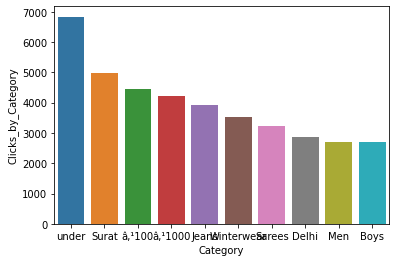

In [40]:
import seaborn as sns
sns.barplot(data=total_clicked_video,x='Category',y='Clicks_by_Category')


From this analysis we can clearly concude that maximum video are watched from under,surat,a100,a1000,jeans,winterwear categories respectively

# **2.Sorting on the basis of total number of users for each category**

In [41]:
Total_user_count=Unique_category_df.sort_values(by='User_count_by_Category', ascending=False).head(10)
Total_user_count

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
28,Surat,4987,"[4.0, 19.0, 1.0]",3,"[63cbdde8e1df7aa629ddd82e, 63cb3894e1df7aa629d...",2245,"[63b3f7c4198bc12f50960a2f, 63b3f7c4198bc12f509...",3,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
76,under,6836,"[1.0, 0.0, -101.0]",3,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",2224,"[633e93cc9c20bfc94b28d632, 6329b0468ab21179907...",14,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
20,Jeans,3935,"[1.0, 21.0]",2,"[63cbdde8e1df7aa629ddd82e, 63426a2f728669c4331...",1909,"[6329b0478ab21179907efa60, 63b3f7c4198bc12f509...",5,"[19991221.0, 19991203.0, 19991208.0, 19991223....",23
73,â‚¹100,4438,"[1.0, 0.0]",2,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1792,"[633e93cc9c20bfc94b28d632, 62d13af71b8085bef48...",7,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
56,â‚¹1000,4233,[1.0],1,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1748,"[633e93cc9c20bfc94b28d632, 62d13af71b8085bef48...",5,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
49,Sarees,3214,"[4.0, 21.0, 1.0]",3,"[63cbdde8e1df7aa629ddd82e, 63cb3894e1df7aa629d...",1618,"[63b3f7c4198bc12f50960a2f, 63b3f7c4198bc12f509...",3,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
41,Winterwear,3513,"[1.0, 4.0, 21.0]",3,"[63c626f3bb59c25f63819e8a, 63b435e6d4483e43122...",1611,"[633e93cc9c20bfc94b28d646, 63b3f7c4198bc12f509...",6,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
59,Delhi,2868,[19.0],1,"[62d5092ae90d251f632704b9, 63a445604ddbf56f286...",1452,[63b3f7c4198bc12f50960a15],1,"[19991203.0, 19991220.0, 19991208.0, 19991223....",21
58,Boys,2684,"[1.0, 21.0, 0.0]",3,"[63cbdde8e1df7aa629ddd82e, 63426a2f728669c4331...",1341,"[6329b0478ab21179907efa60, 63b3f7c4198bc12f509...",9,"[19991221.0, 19991203.0, 19991208.0, 19991223....",23
24,Men,2712,"[1.0, 0.0, -101.0]",3,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1291,"[633e93cc9c20bfc94b28d632, 633e93cc9c20bfc94b2...",4,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23


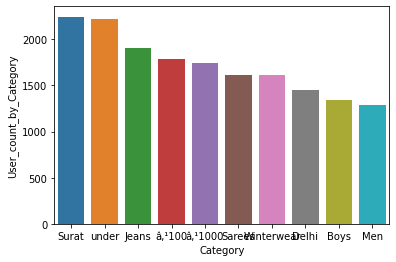

In [43]:

# Change seaborn plot size
sns.barplot(data=Total_user_count,x='Category',y='User_count_by_Category')

From This we can clearly state that in dataset maximum user are from surat,under,jeans,a1000,saree,winterwear,delhi,boys respectively

# 3. Sorting based on total number of ContainerID's 

In [44]:
Unique_category_df.sort_values(by='ContainerID_count_by_Category', ascending=False).head(10)

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
76,under,6836,"[1.0, 0.0, -101.0]",3,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",2224,"[633e93cc9c20bfc94b28d632, 6329b0468ab21179907...",14,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
19,Shirts,2476,"[21.0, 1.0, 0.0]",3,"[63cc11ade1df7aa629df6eba, 63bd92ae12bfc629ea6...",1222,"[63b3f7c4198bc12f50960ab1, 63b3f7c4198bc12f509...",10,"[19991221.0, 19991215.0, 19991203.0, 19991216....",23
58,Boys,2684,"[1.0, 21.0, 0.0]",3,"[63cbdde8e1df7aa629ddd82e, 63426a2f728669c4331...",1341,"[6329b0478ab21179907efa60, 63b3f7c4198bc12f509...",9,"[19991221.0, 19991203.0, 19991208.0, 19991223....",23
68,-1,797,"[2.0, -1.0, -11.0, -12.0, -10.0, -13.0, -14.0,...",8,"[63a9a88d1d71aed7ec02b37f, 63bb02a712bfc629ea6...",370,"[63a4243395540c5aa11f1d66, 627a66787327a813eb0...",8,"[19991215.0, 19991208.0, 19991201.0, 19991202....",22
53,Girls,1510,"[1.0, 21.0, 0.0]",3,"[63c626f3bb59c25f63819e8a, 63b435e6d4483e43122...",864,"[633e93cc9c20bfc94b28d646, 63b3f7c4198bc12f509...",8,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
73,â‚¹100,4438,"[1.0, 0.0]",2,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1792,"[633e93cc9c20bfc94b28d632, 62d13af71b8085bef48...",7,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
62,Tops,2496,"[1.0, 21.0]",2,"[63acb0093444086d9c5fcb43, 63b5c9e312bfc629ea4...",1121,"[6329b0478ab21179907efa79, 63b3f7c4198bc12f509...",7,"[19991203.0, 19991208.0, 19991223.0, 19991215....",23
74,Jackets,2414,"[1.0, 21.0, -101.0]",3,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1260,"[633e93cc9c20bfc94b28d632, 63b3f7c4198bc12f509...",6,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
41,Winterwear,3513,"[1.0, 4.0, 21.0]",3,"[63c626f3bb59c25f63819e8a, 63b435e6d4483e43122...",1611,"[633e93cc9c20bfc94b28d646, 63b3f7c4198bc12f509...",6,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
9,Sweater,1873,"[1.0, 21.0]",2,"[63cbdde8e1df7aa629ddd82e, 62d5092ae90d251f632...",1055,"[633e93cc9c20bfc94b28d637, 63b3f7c4198bc12f509...",6,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23


# 4. Sorting based on total number of event_dates

In [46]:
Unique_category_df.sort_values(by='event_date_count_by_Category', ascending=False).head(10)

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
0,Ladies,1027,[1.0],1,"[63bafbc812bfc629ea60e588, 63c42993bb59c25f637...",682,"[6329b0478ab21179907efa6f, 63031d38c997f315e12...",2,"[19991208.0, 19991215.0, 19991201.0, 19991202....",23
31,Latest,700,[1.0],1,"[63c96b90e1df7aa629d11bd1, 63aed86b3444086d9c6...",430,[62d13af71b8085bef487e4fb],1,"[19991221.0, 19991208.0, 19991215.0, 19991201....",23
36,Frocks,492,"[21.0, 1.0]",2,"[63caee29e1df7aa629d8dee3, 63b9352112bfc629ea5...",323,"[63b3f7c4198bc12f50960a93, 6329b0468ab21179907...",2,"[19991220.0, 19991215.0, 19991216.0, 19991222....",23
41,Winterwear,3513,"[1.0, 4.0, 21.0]",3,"[63c626f3bb59c25f63819e8a, 63b435e6d4483e43122...",1611,"[633e93cc9c20bfc94b28d646, 63b3f7c4198bc12f509...",6,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
42,â‚¹500,645,"[1.0, 0.0]",2,"[63cae49ee1df7aa629d8c413, 63caef19e1df7aa629d...",381,"[6329b0468ab21179907efa12, 62fb6bf0c997f315e12...",2,"[19991220.0, 19991215.0, 19991208.0, 19991201....",23
44,Palazzo,553,[1.0],1,"[63cae49ee1df7aa629d8c413, 63bafbc812bfc629ea6...",350,"[6329b0468ab21179907efa3d, 6329b0468ab21179907...",2,"[19991220.0, 19991208.0, 19991201.0, 19991215....",23
46,Ethnic,1708,"[1.0, 0.0, 21.0]",3,"[63cbdde8e1df7aa629ddd82e, 63aed86b3444086d9c6...",818,"[6329b0468ab21179907efa38, 627a66787327a813eb0...",4,"[19991221.0, 19991208.0, 19991215.0, 19991201....",23
47,â‚¹300,1171,"[1.0, 0.0, -101.0]",3,"[63c96b90e1df7aa629d11bd1, 63aed86b3444086d9c6...",645,"[62d13af71b8085bef487e4fb, 62d13af71b8085bef48...",4,"[19991221.0, 19991208.0, 19991215.0, 19991201....",23
49,Sarees,3214,"[4.0, 21.0, 1.0]",3,"[63cbdde8e1df7aa629ddd82e, 63cb3894e1df7aa629d...",1618,"[63b3f7c4198bc12f50960a2f, 63b3f7c4198bc12f509...",3,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
52,Indian,1001,[1.0],1,"[63cc2108e1df7aa629dfc681, 63cae49ee1df7aa629d...",625,[6305e5f2c997f315e123826b],1,"[19991221.0, 19991220.0, 19991208.0, 19991223....",23


Questions
1. In the broadest video categorization of men, women & kids, are the users watching videos of a specific category? What % of users are watching videos from all 3 categories v/s only 1 category? Assume that every container_clicked leads to a video
2. Within a video category, let's say men, what % of users are watching videos from only from 1 subcategory, 2 subcategories and so on..How many sub-categories covers 90% of the users? [Make reasonable assumptions on which subcategories belong to which category and mention those in your response sheet]
Bonus (Optional) : Given the above 2 analysis, what changes do you recommend on the home screen to enhance user experience while visiting this home page.

In [47]:
#Total unique category present in dataset
Unique_category_df['Category'].unique()

array(['Ladies', '-6', 'Babasuits', 'Trousers', 'Formal', 'â‚¹2000', '-2',
       'Hoodies', '-12', 'Sweater', 'Trendy', 'Suits', 'Wear',
       'Trackpants', '-7', 'Infants', 'Ludhiana', 'Garments', '-13',
       'Shirts', 'Jeans', '-4', 'Choli', 'Tracksuits', 'Men', 'Lehenga',
       'Partywear', '-100', 'Surat', 'Topwear', "Women's", 'Latest',
       'Ethnicwear', 'Fashion', 'Active', "Men's", 'Frocks', 'Plazzos',
       'Bestselling', '-10', 'Best', 'Winterwear', 'â‚¹500', 'Shorts',
       'Palazzo', 'Tshirts', 'Ethnic', 'â‚¹300', '-11', 'Sarees',
       'Clothing', '-5', 'Indian', 'Girls', '-14', 'T-Shirts', 'â‚¹1000',
       'Kurtis', 'Boys', 'Delhi',
       'https://bizup-posts.s3.ap-south-1.amazonaws.com/bizcard/WinterCollection+(1).jpg',
       'Premium', 'Tops', 'Middies', 'Set', 'Gowns', 'Casual', '-9', '-1',
       'Joggers', '-3', 'Everyday', 'Salwar', 'â‚¹100', 'Jackets',
       'Dangris', 'under', 'Palazzos', 'Trending', '-8'], dtype=object)

In [50]:
Unique_category_df[Unique_category_df['Category'] == 'Men']

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
24,Men,2712,"[1.0, 0.0, -101.0]",3,"[63cc115de1df7aa629df6a6a, 63bbf22412bfc629ea6...",1291,"[633e93cc9c20bfc94b28d632, 633e93cc9c20bfc94b2...",4,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23


In [51]:
Unique_category_df[Unique_category_df['Category'] == "Women's"]

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
30,Women's,420,[1.0],1,"[63bafbc812bfc629ea60e588, 63c2d407bb59c25f637...",273,[62d13af71b8085bef487e514],1,"[19991208.0, 19991215.0, 19991201.0, 19991202....",23


In [52]:
Unique_category_df[Unique_category_df['Category'].isin(['Infants','Boys','Girls'])]

,Category,Clicks_by_Category,Types_by_Category,Types_count_by_Category,Unique_user_by_Category,User_count_by_Category,Unique_ContainerID_by_Category,ContainerID_count_by_Category,Unique_event_date_by_Category,event_date_count_by_Category
15,Infants,791,"[21.0, 1.0]",2,"[63c2d291bb59c25f63751828, 63c3adc5bb59c25f637...",502,"[63b3f7c4198bc12f50960ae3, 633e93cc9c20bfc94b2...",3,"[19991215.0, 19991203.0, 19991216.0, 19991222....",23
53,Girls,1510,"[1.0, 21.0, 0.0]",3,"[63c626f3bb59c25f63819e8a, 63b435e6d4483e43122...",864,"[633e93cc9c20bfc94b28d646, 63b3f7c4198bc12f509...",8,"[19991221.0, 19991203.0, 19991220.0, 19991208....",23
58,Boys,2684,"[1.0, 21.0, 0.0]",3,"[63cbdde8e1df7aa629ddd82e, 63426a2f728669c4331...",1341,"[6329b0478ab21179907efa60, 63b3f7c4198bc12f509...",9,"[19991221.0, 19991203.0, 19991208.0, 19991223....",23


In [60]:
#Analysing category wise data in order to get popular category with respect to user
Men_count = Unique_category_df[Unique_category_df['Category'] == 'Men']['User_count_by_Category'].sum()
Women_count = Unique_category_df[Unique_category_df['Category'] == "Women's"]['User_count_by_Category'].sum()
Kid_count = Unique_category_df[Unique_category_df['Category'].isin(['Infants','Boys','Girls'])]['User_count_by_Category'].sum()
total_users = len(merged_df['user_id'].unique().tolist())
print(f'The total user count is {total_users}')
percentage_of_users_searching_Men_category = round((Men_count/total_users)*100)
percentage_of_users_searching_Women_category = round((Women_count/total_users)*100)
percentage_of_users_searching_kids_category = round((Kid_count/total_users)*100)
total_search_percentage = round(((Men_count+Women_count+Kid_count)/total_users)*100)
others=100-total_search_percentage
print('\n')
print(f' While {percentage_of_users_searching_Men_category}% people selected by Male category, \
{percentage_of_users_searching_Women_category}% people searched by female category and \
{percentage_of_users_searching_kids_category}% people searched by kids category on our website.')
print('\n')
print(f' Overall, The Men, women and kid category accounted for an {total_search_percentage}% search on the website.')

The total user count is 5128


 While 25% people selected by Male category, 5% people searched by female category and 53% people searched by kids category on our website.


 Overall, The Men, women and kid category accounted for an 83% search on the website.


Final conclusions:

1.We can conclude that maximum 53% video are watched from kids category,second highest is men's category 25% video are watched,5% video are watched by women's category,there are some comman catergory like jeans winterwear that included in others and its percentage is 17%

2.The three category men women and kids togetherly contribute to the 83% of search video.

3.From this analysis we can clearly conclude that maximum video are being watched from under,surat,a100,a1000,jeans,winterwear categories respectively.

4.we can clearly state that in dataset maximum user are from surat,under,jeans,a1000,saree,winterwear,delhi,boys respectively

5.so from above two analysis we can recommend that the products from surat textile, under 100 under 1000,jeans,Winterwear,sarees are popular from app.so this container can be added to the home screen in recommendations